In [2]:
#!pip install plotly

# PCA

## Import Modules & Data

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from tqdm import notebook

In [2]:
inv_matrix = pd.read_csv('shuffled_inverse_matrix.csv')

In [3]:
data = inv_matrix[inv_matrix.columns[1:]]
prod = inv_matrix[inv_matrix.columns[0]]
data.shape

(7000, 15186)

In [109]:
p_type_df = pd.DataFrame(columns=['product_type','product'])
p_type_df['product'] = prod
p_type_df

,product_type,product
0,NaN,joah-skin-polish-gold-peel-off-mask
1,NaN,uriage-thermal-micellar-water-for-normal-to-dr...
2,NaN,shu-uemura-skin-purifier-ultime8-sublime-beaut...
3,NaN,qms-medicosmetics-qms-tinted-day-cream
4,NaN,planet-revolution-grapefruit-brightening-clean...
...,...,...
6995,NaN,dr-roebucks-no-worries-hydrating-face-moisturizer
6996,NaN,dr-lili-fan-probiotic-eye-repair-cream
6997,NaN,g9skin-self-aesthetic-pore-clean-bubble-mask
6998,NaN,isntree-sensitive-balancing-thermal-toner


In [120]:
for idx,row in p_type_df.iterrows():
    if idx == 5:
        break
    print(row['product'])

joah-skin-polish-gold-peel-off-mask
uriage-thermal-micellar-water-for-normal-to-dry-skin
shu-uemura-skin-purifier-ultime8-sublime-beauty-cleansing-oil
qms-medicosmetics-qms-tinted-day-cream
planet-revolution-grapefruit-brightening-cleansing-water


In [176]:
# 간단한 확인을 위한 야매라벨 1
product_types = ['sun','cleans','hair','mask','toner','serum','essence','ampoule','emulsion','cream','lotion']
for idx,row in notebook.tqdm(p_type_df.iterrows()):
    for type in product_types: 
        if type in row['product']:
            p_type_df.loc[idx]['product_type'] = type
            break
        else:
            p_type_df.loc[idx]['product_type'] = 'N/A'
p_type_df
typeA = p_type_df['product_type'].values
print('N/A count: ',len(p_type_df[p_type_df['product_type']=='N/A']))

0it [00:00, ?it/s]

N/A count:  3287


In [ ]:
# 간단한 확인을 위한 야매라벨 2

uv = ['sun','sunblock','suncream','sunscreen']
cleanse = ['cleansing','cleanser','cleanse']
hair = ['hair','shampoo','conditioner']
mask = ['peel','mask']
moisturiser_w = ['toner','serum','essence','ampoule']
moisturiser_e = ['emulsion','cream','lotion']

for idx,row in notebook.tqdm(p_type_df.iterrows()):
    if row['product'] in any(uv):
        
    if product_types 
    for type in product_types: 
        if type in row['product']:
            p_type_df.loc[idx]['product_type'] = type
            break
        else:
            p_type_df.loc[idx]['product_type'] = 'N/A'
    

## Functions

In [4]:
def get_pca_data(data,n_components):
    pca = PCA(n_components=n_components)
    pca.fit(data)

    return pca.transform(data), pca

In [5]:
def get_pca_df(pca_data,pca):
    cols = ['pca_'+str(1+i) for i in range(pca.components_.shape[0])] 
    
    return pd.DataFrame(pca_data,columns=cols)

## PCA Preview: 2_Components 

In [106]:
skca_pca2, pca2 = get_pca_data(data,2)

print('PCA.shape: ',skca_pca2.shape)
print('Components.shape: ', pca2.components_.shape)
print('Explained Variance Ratio: ',pca2.explained_variance_ratio_,'= TOTAL ',np.sum(pca2.explained_variance_ratio_))


PCA.shape:  (7000, 2)
Components.shape:  (2, 15186)
Explained Variance Ratio:  [0.18811511 0.03437515] = TOTAL  0.2224902576294407


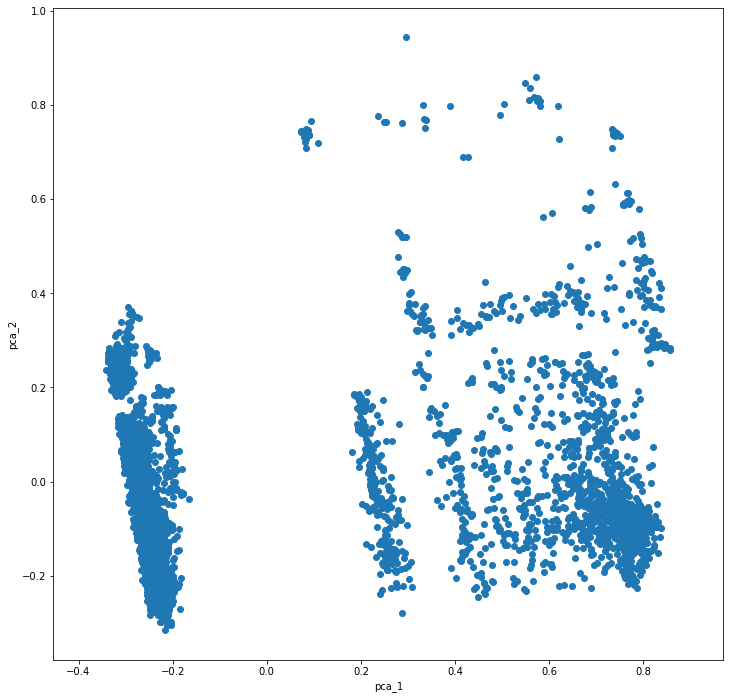

In [181]:
skca_pca2_df=get_pca_df(skca_pca2,pca2)
plt.figure(figsize=(12,12))

plt.scatter(skca_pca2_df['pca_1'],skca_pca2_df['pca_2'])
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.axis('equal')
plt.show()

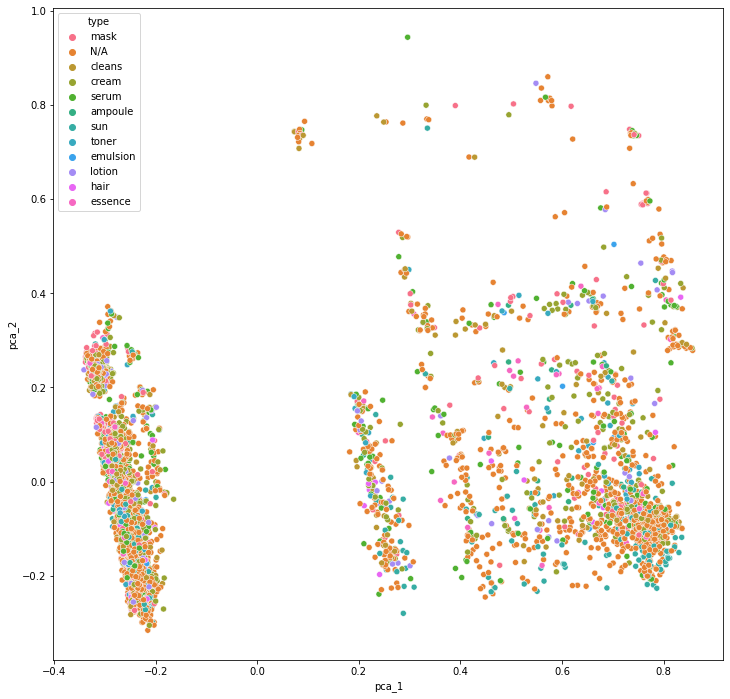

In [179]:
import seaborn as sns
plt.figure(figsize=(12,12))
skca_pca2_df=get_pca_df(skca_pca2,pca2)
skca_pca2_df['type'] = typeA
sns.scatterplot(x='pca_1',y='pca_2',hue='type',data=skca_pca2_df)
plt.show()


In [172]:
skca_pca3, pca3 = get_pca_data(data,3)
print(pca3.explained_variance_ratio_,'= TOTAL ',np.sum(pca3.explained_variance_ratio_))

[0.18811511 0.03437515 0.02898294] = TOTAL  0.251473195854585


In [180]:
skca_pca3_df = get_pca_df(skca_pca3,pca3)
skca_pca3_df['product'] = prod
skca_pca3_df['type'] = typeA
skca_pca3_df
fig=px.scatter_3d(skca_pca3_df,x='pca_1',y='pca_2',z='pca_3',color='type',opacity=0.4)
fig.update_layout(margin=dict(l=0,r=0,b=0,t=0))
fig.show()

In [12]:
skca_pca10,pca10 = get_pca_data(data,10)
print(pca10.explained_variance_ratio_,'= TOTAL ',np.sum(pca10.explained_variance_ratio_))
skca_pca10_df = get_pca_df(skca_pca10,pca10)
skca_pca10_df['product'] = prod
skca_pca10_df

[0.18811511 0.03437515 0.02898294 0.0224544  0.01826053 0.01699724
 0.01331203 0.01275842 0.01267293 0.01185581] = TOTAL  0.35978454543986793


,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,product
0,-0.231381,-0.215867,0.072750,-0.038982,-0.044136,-0.050036,0.032624,-0.025874,0.022406,0.051635,joah-skin-polish-gold-peel-off-mask
1,-0.271638,0.004212,0.003307,-0.007708,-0.099629,0.010490,0.010891,-0.016753,-0.037373,0.005358,uriage-thermal-micellar-water-for-normal-to-dr...
2,0.769069,-0.076747,-0.087849,0.252251,0.059751,-0.083373,-0.014668,-0.108646,-0.002263,0.025486,shu-uemura-skin-purifier-ultime8-sublime-beaut...
3,-0.242918,-0.134509,0.023873,0.033419,-0.020449,0.113580,0.140521,0.083832,0.180002,0.038329,qms-medicosmetics-qms-tinted-day-cream
4,-0.326246,0.230141,-0.076491,-0.035764,-0.110760,0.009932,0.071918,-0.044610,-0.089223,0.216680,planet-revolution-grapefruit-brightening-clean...
...,...,...,...,...,...,...,...,...,...,...,...
6995,-0.286177,0.082043,-0.029360,0.058593,-0.080462,0.069987,-0.011771,0.055465,0.039798,-0.010312,dr-roebucks-no-worries-hydrating-face-moisturizer
6996,-0.234499,-0.028322,0.097709,0.028402,-0.030836,-0.021145,-0.047427,0.096171,0.002174,-0.008516,dr-lili-fan-probiotic-eye-repair-cream
6997,0.536928,0.352598,-0.215082,-0.127556,-0.115510,-0.048799,0.022805,-0.064491,-0.089735,-0.040000,g9skin-self-aesthetic-pore-clean-bubble-mask
6998,0.190685,0.180643,-0.148991,-0.139216,0.058644,-0.138283,0.006553,0.018501,0.006027,-0.052557,isntree-sensitive-balancing-thermal-toner


In [40]:
skca_pca100,pca100 = get_pca_data(data,100)
print(np.sum(pca100.explained_variance_ratio_))

0.6935050474093978


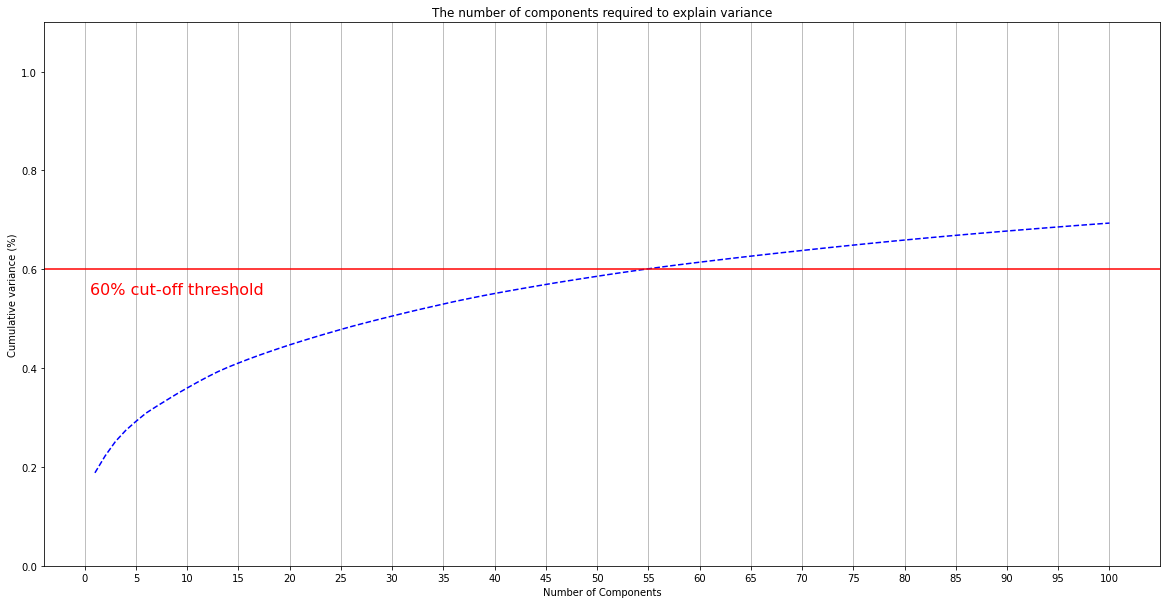

In [59]:

fig, ax = plt.subplots(figsize=(20,10))
#fig.figure(figsize=(15,15))
xi = np.arange(1, 101, step=1)
y = np.cumsum(pca100.explained_variance_ratio_)

plt.ylim(0.0,1.1)
if np.cumsum == 0.6:
    plt.plot(xi, y, marker='o', linestyle='--', color='r')
else:
    plt.plot(xi, y, linestyle='--',color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0,101, step=5)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components required to explain variance')

plt.axhline(y=0.60, color='r', linestyle='-')
plt.text(0.5, 0.55, '60% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
skca_pca100,pca100 = get_pca_data(data,100)
print(np.sum(pca100.explained_variance_ratio_))plt.show()

In [186]:
skca_pca300,pca300 = get_pca_data(data,300)
print(np.sum(pca300.explained_variance_ratio_))

0.8391474876655844


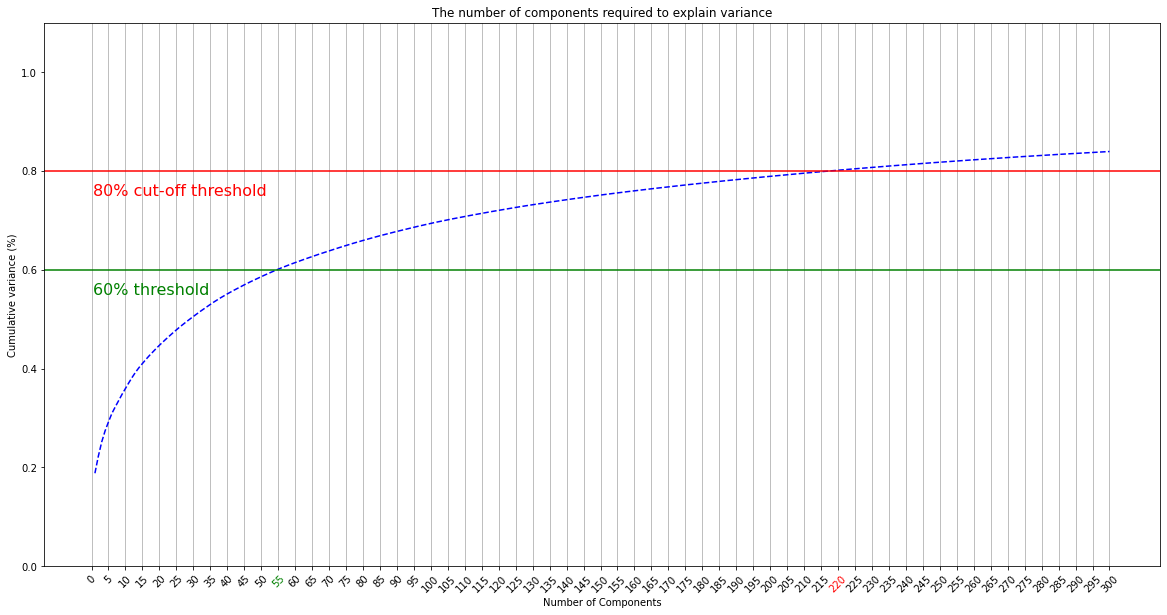

In [198]:
#skca_pca200,pca200 = get_pca_data(data,200)
#print(np.sum(pca200.explained_variance_ratio_))

fig, ax = plt.subplots(figsize=(20,10))
#fig.figure(figsize=(15,15))
xi = np.arange(1, 301, step=1)
y = np.cumsum(pca300.explained_variance_ratio_)

plt.ylim(0.0,1.1)
if np.cumsum == 0.6:
    plt.plot(xi, y, marker='o', linestyle='--', color='r')
else:
    plt.plot(xi, y, linestyle='--',color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0,301, step=5),rotation=45) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components required to explain variance')

plt.axhline(y=0.60, color='g', linestyle='-')
plt.text(0.5, 0.55, '60% threshold', color = 'green', fontsize=16)

plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.75, '80% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
ax.get_xticklabels()[11].set_color("green")
ax.get_xticklabels()[44].set_color("red")

plt.show()
plt.show()

In [190]:
skca_pca220,pca220 = get_pca_data(data,220)
evr = pca220.explained_variance_ratio_
print(evr)
print(np.sum(evr))

pca220_df = pd.DataFrame(prod)
pca220_df.rename(columns={'Unnamed: 0':'product'},inplace=True)
df = get_pca_df(skca_pca220,pca220)
df['product'] = prod
pca220_df = pd.merge(pca220_df,df,on='product')
pca220_df

[0.18811511 0.03437515 0.02898294 0.0224544  0.01826053 0.01699725
 0.01331216 0.0127589  0.0126736  0.01185656 0.01158765 0.01110603
 0.01033093 0.00917807 0.00828918 0.00798572 0.00764078 0.00725757
 0.00703744 0.00687291 0.00653309 0.0063772  0.00626005 0.00604092
 0.0059886  0.00580117 0.0054894  0.00537005 0.00525707 0.00512663
 0.00510132 0.00498356 0.00484361 0.00474688 0.00469896 0.00466157
 0.00435673 0.00425687 0.00409686 0.0039168  0.00383857 0.00371602
 0.00364089 0.00360025 0.00352265 0.00347466 0.00334322 0.00328451
 0.00323016 0.00319763 0.00318004 0.00308251 0.00300486 0.00298838
 0.00291609 0.00283801 0.00272566 0.00264785 0.00260112 0.00252643
 0.0025137  0.00246948 0.00245914 0.00241876 0.00238354 0.00235079
 0.00232038 0.00227566 0.00226531 0.00225343 0.00223897 0.00221248
 0.00218458 0.00216251 0.00211181 0.00210737 0.00208894 0.0020502
 0.00202627 0.00196967 0.00194367 0.00192859 0.00190399 0.00188896
 0.00184332 0.00179474 0.00176914 0.00175952 0.00172611 0.00171

,product,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_211,pca_212,pca_213,pca_214,pca_215,pca_216,pca_217,pca_218,pca_219,pca_220
0,joah-skin-polish-gold-peel-off-mask,-0.231381,-0.215867,0.072749,-0.038984,-0.044145,-0.050076,0.032474,-0.025951,0.022221,...,0.011965,-0.004901,0.007530,-0.014296,0.015415,-0.025229,-0.046106,-0.020547,0.026276,0.052693
1,uriage-thermal-micellar-water-for-normal-to-dr...,-0.271638,0.004212,0.003308,-0.007711,-0.099628,0.010502,0.010857,-0.017097,-0.037325,...,0.029437,-0.027639,0.016313,0.015203,-0.005785,-0.012713,-0.027441,0.009235,0.011437,0.002029
2,shu-uemura-skin-purifier-ultime8-sublime-beaut...,0.769069,-0.076747,-0.087849,0.252247,0.059739,-0.083367,-0.014667,-0.109006,-0.001986,...,0.003219,0.015405,0.024970,0.009444,0.010260,-0.010233,0.000137,-0.004766,-0.000963,0.004501
3,qms-medicosmetics-qms-tinted-day-cream,-0.242918,-0.134509,0.023873,0.033419,-0.020493,0.113604,0.140812,0.084269,0.180271,...,-0.024880,-0.035440,0.021266,-0.012835,0.031225,0.033318,0.002553,-0.032857,0.000518,-0.025932
4,planet-revolution-grapefruit-brightening-clean...,-0.326246,0.230141,-0.076491,-0.035763,-0.110765,0.009947,0.072082,-0.045089,-0.088798,...,-0.001606,0.010268,-0.010935,-0.002024,0.007629,0.001788,-0.004428,0.014479,0.012907,0.010502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,dr-roebucks-no-worries-hydrating-face-moisturizer,-0.286177,0.082043,-0.029359,0.058591,-0.080462,0.070000,-0.011810,0.055625,0.039419,...,-0.072910,0.020803,-0.019528,-0.093275,0.052268,-0.046282,-0.015092,0.048918,0.023634,-0.122483
6996,dr-lili-fan-probiotic-eye-repair-cream,-0.234499,-0.028322,0.097709,0.028416,-0.030866,-0.021072,-0.047080,0.096901,0.002885,...,0.062079,-0.026294,-0.058077,-0.018886,0.010298,0.021567,-0.012493,0.005645,0.003725,-0.020802
6997,g9skin-self-aesthetic-pore-clean-bubble-mask,0.536928,0.352598,-0.215082,-0.127558,-0.115527,-0.048802,0.022432,-0.064860,-0.089842,...,0.012205,0.000577,0.003284,-0.001876,0.000614,-0.002484,-0.001108,0.005155,0.011784,-0.006533
6998,isntree-sensitive-balancing-thermal-toner,0.190685,0.180643,-0.148990,-0.139216,0.058642,-0.138275,0.006504,0.018508,0.005837,...,-0.015026,-0.050478,0.023271,-0.043272,-0.019576,0.007232,-0.071604,-0.005734,-0.039779,0.014504


In [191]:
pca220_df.to_csv('./data/pca220.csv',index=False)

In [192]:
check = pd.read_csv('./data/pca220.csv')
check

,product,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_211,pca_212,pca_213,pca_214,pca_215,pca_216,pca_217,pca_218,pca_219,pca_220
0,joah-skin-polish-gold-peel-off-mask,-0.231381,-0.215867,0.072749,-0.038984,-0.044145,-0.050076,0.032474,-0.025951,0.022221,...,0.011965,-0.004901,0.007530,-0.014296,0.015415,-0.025229,-0.046106,-0.020547,0.026276,0.052693
1,uriage-thermal-micellar-water-for-normal-to-dr...,-0.271638,0.004212,0.003308,-0.007711,-0.099628,0.010502,0.010857,-0.017097,-0.037325,...,0.029437,-0.027639,0.016313,0.015203,-0.005785,-0.012713,-0.027441,0.009235,0.011437,0.002029
2,shu-uemura-skin-purifier-ultime8-sublime-beaut...,0.769069,-0.076747,-0.087849,0.252247,0.059739,-0.083367,-0.014667,-0.109006,-0.001986,...,0.003219,0.015405,0.024970,0.009444,0.010260,-0.010233,0.000137,-0.004766,-0.000963,0.004501
3,qms-medicosmetics-qms-tinted-day-cream,-0.242918,-0.134509,0.023873,0.033419,-0.020493,0.113604,0.140812,0.084269,0.180271,...,-0.024880,-0.035440,0.021266,-0.012835,0.031225,0.033318,0.002553,-0.032857,0.000518,-0.025932
4,planet-revolution-grapefruit-brightening-clean...,-0.326246,0.230141,-0.076491,-0.035763,-0.110765,0.009947,0.072082,-0.045089,-0.088798,...,-0.001606,0.010268,-0.010935,-0.002024,0.007629,0.001788,-0.004428,0.014479,0.012907,0.010502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,dr-roebucks-no-worries-hydrating-face-moisturizer,-0.286177,0.082043,-0.029359,0.058591,-0.080462,0.070000,-0.011810,0.055625,0.039419,...,-0.072910,0.020803,-0.019528,-0.093275,0.052268,-0.046282,-0.015092,0.048918,0.023634,-0.122483
6996,dr-lili-fan-probiotic-eye-repair-cream,-0.234499,-0.028322,0.097709,0.028416,-0.030866,-0.021072,-0.047080,0.096901,0.002885,...,0.062079,-0.026294,-0.058077,-0.018886,0.010298,0.021567,-0.012493,0.005645,0.003725,-0.020802
6997,g9skin-self-aesthetic-pore-clean-bubble-mask,0.536928,0.352598,-0.215082,-0.127558,-0.115527,-0.048802,0.022432,-0.064860,-0.089842,...,0.012205,0.000577,0.003284,-0.001876,0.000614,-0.002484,-0.001108,0.005155,0.011784,-0.006533
6998,isntree-sensitive-balancing-thermal-toner,0.190685,0.180643,-0.148990,-0.139216,0.058642,-0.138275,0.006504,0.018508,0.005837,...,-0.015026,-0.050478,0.023271,-0.043272,-0.019576,0.007232,-0.071604,-0.005734,-0.039779,0.014504


In [63]:
skca_pca55,pca55 = get_pca_data(data,55)
evr = pca55.explained_variance_ratio_
print(evr)
print(np.sum(evr))

[0.18811511 0.03437515 0.02898294 0.0224544  0.01826053 0.01699725
 0.01331216 0.0127589  0.0126736  0.01185656 0.01158765 0.01110603
 0.01033093 0.00917807 0.00828918 0.00798572 0.00764078 0.00725757
 0.00703744 0.00687291 0.00653309 0.00637719 0.00626005 0.00604092
 0.00598859 0.00580117 0.00548939 0.00537004 0.00525705 0.00512661
 0.00510131 0.00498354 0.00484348 0.00474685 0.00469892 0.00466153
 0.00435659 0.00425584 0.00409631 0.00391545 0.00383808 0.00371441
 0.00363971 0.00359892 0.00351769 0.00347183 0.00333948 0.00328194
 0.00322825 0.00319147 0.00317574 0.00306763 0.00299274 0.00293985
 0.00290319]
0.6008777293237502


In [70]:
pca55_df = pd.DataFrame(prod)
pca55_df.rename(columns={'Unnamed: 0':'product'},inplace=True)
pca55_df

,product
0,joah-skin-polish-gold-peel-off-mask
1,uriage-thermal-micellar-water-for-normal-to-dr...
2,shu-uemura-skin-purifier-ultime8-sublime-beaut...
3,qms-medicosmetics-qms-tinted-day-cream
4,planet-revolution-grapefruit-brightening-clean...
...,...
6995,dr-roebucks-no-worries-hydrating-face-moisturizer
6996,dr-lili-fan-probiotic-eye-repair-cream
6997,g9skin-self-aesthetic-pore-clean-bubble-mask
6998,isntree-sensitive-balancing-thermal-toner


In [98]:
pca55_df = pd.DataFrame(prod)
pca55_df.rename(columns={'Unnamed: 0':'product'},inplace=True)
df = get_pca_df(skca_pca55,pca55)
df['product'] = prod
pca55_df = pd.merge(pca55_df,df,on='product')
pca55_df

,product,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_46,pca_47,pca_48,pca_49,pca_50,pca_51,pca_52,pca_53,pca_54,pca_55
0,joah-skin-polish-gold-peel-off-mask,-0.231381,-0.215867,0.072749,-0.038984,-0.044145,-0.050076,0.032474,-0.025951,0.022221,...,-0.028100,0.011877,0.002860,-0.022209,-0.008807,0.011590,-0.043291,0.052240,-0.094044,0.114359
1,uriage-thermal-micellar-water-for-normal-to-dr...,-0.271638,0.004212,0.003308,-0.007711,-0.099628,0.010502,0.010857,-0.017097,-0.037325,...,-0.031934,-0.001076,0.009680,-0.033021,-0.015259,0.001016,-0.027049,0.001250,-0.035280,-0.063686
2,shu-uemura-skin-purifier-ultime8-sublime-beaut...,0.769069,-0.076747,-0.087849,0.252247,0.059739,-0.083367,-0.014667,-0.109006,-0.001986,...,0.009255,0.090225,0.052792,0.039206,0.016455,-0.166228,-0.050128,-0.068709,-0.082339,-0.009455
3,qms-medicosmetics-qms-tinted-day-cream,-0.242918,-0.134509,0.023873,0.033419,-0.020493,0.113604,0.140812,0.084269,0.180271,...,-0.054059,0.284241,-0.020499,0.006848,-0.128554,-0.000501,0.029245,-0.033366,0.037501,0.056437
4,planet-revolution-grapefruit-brightening-clean...,-0.326246,0.230141,-0.076491,-0.035763,-0.110765,0.009947,0.072082,-0.045089,-0.088798,...,-0.021629,0.014055,0.046447,-0.002823,-0.020620,0.012640,-0.018408,0.003659,-0.004289,-0.038353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,dr-roebucks-no-worries-hydrating-face-moisturizer,-0.286177,0.082043,-0.029359,0.058591,-0.080462,0.070000,-0.011810,0.055625,0.039419,...,-0.012840,0.037217,0.039148,-0.072748,0.082678,0.034295,0.015030,0.052232,0.027640,-0.034890
6996,dr-lili-fan-probiotic-eye-repair-cream,-0.234499,-0.028322,0.097709,0.028416,-0.030866,-0.021072,-0.047080,0.096901,0.002886,...,0.322503,0.070736,0.046521,-0.050440,0.051451,0.025316,-0.001699,-0.010193,0.036463,0.014080
6997,g9skin-self-aesthetic-pore-clean-bubble-mask,0.536928,0.352598,-0.215082,-0.127558,-0.115527,-0.048802,0.022432,-0.064860,-0.089842,...,0.074929,0.000406,0.045160,0.011116,0.000930,0.023421,0.054420,-0.024254,0.022286,0.005531
6998,isntree-sensitive-balancing-thermal-toner,0.190685,0.180643,-0.148990,-0.139216,0.058642,-0.138275,0.006504,0.018508,0.005837,...,-0.042240,-0.009364,-0.039165,-0.024443,0.026710,-0.005236,-0.017731,0.031638,-0.057876,0.060724


In [100]:
pca55_df.to_csv('./data/pca55.csv',index=False)

In [102]:
check = pd.read_csv('./data/pca55.csv')
check

,product,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_46,pca_47,pca_48,pca_49,pca_50,pca_51,pca_52,pca_53,pca_54,pca_55
0,joah-skin-polish-gold-peel-off-mask,-0.231381,-0.215867,0.072749,-0.038984,-0.044145,-0.050076,0.032474,-0.025951,0.022221,...,-0.028100,0.011877,0.002860,-0.022209,-0.008807,0.011590,-0.043291,0.052240,-0.094044,0.114359
1,uriage-thermal-micellar-water-for-normal-to-dr...,-0.271638,0.004212,0.003308,-0.007711,-0.099628,0.010502,0.010857,-0.017097,-0.037325,...,-0.031934,-0.001076,0.009680,-0.033021,-0.015259,0.001016,-0.027049,0.001250,-0.035280,-0.063686
2,shu-uemura-skin-purifier-ultime8-sublime-beaut...,0.769069,-0.076747,-0.087849,0.252247,0.059739,-0.083367,-0.014667,-0.109006,-0.001986,...,0.009255,0.090225,0.052792,0.039206,0.016455,-0.166228,-0.050128,-0.068709,-0.082339,-0.009455
3,qms-medicosmetics-qms-tinted-day-cream,-0.242918,-0.134509,0.023873,0.033419,-0.020493,0.113604,0.140812,0.084269,0.180271,...,-0.054059,0.284241,-0.020499,0.006848,-0.128554,-0.000501,0.029245,-0.033366,0.037501,0.056437
4,planet-revolution-grapefruit-brightening-clean...,-0.326246,0.230141,-0.076491,-0.035763,-0.110765,0.009947,0.072082,-0.045089,-0.088798,...,-0.021629,0.014055,0.046447,-0.002823,-0.020620,0.012640,-0.018408,0.003659,-0.004289,-0.038353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,dr-roebucks-no-worries-hydrating-face-moisturizer,-0.286177,0.082043,-0.029359,0.058591,-0.080462,0.070000,-0.011810,0.055625,0.039419,...,-0.012840,0.037217,0.039148,-0.072748,0.082678,0.034295,0.015030,0.052232,0.027640,-0.034890
6996,dr-lili-fan-probiotic-eye-repair-cream,-0.234499,-0.028322,0.097709,0.028416,-0.030866,-0.021072,-0.047080,0.096901,0.002886,...,0.322503,0.070736,0.046521,-0.050440,0.051451,0.025316,-0.001699,-0.010193,0.036463,0.014080
6997,g9skin-self-aesthetic-pore-clean-bubble-mask,0.536928,0.352598,-0.215082,-0.127558,-0.115527,-0.048802,0.022432,-0.064860,-0.089842,...,0.074929,0.000406,0.045160,0.011116,0.000930,0.023421,0.054420,-0.024254,0.022286,0.005531
6998,isntree-sensitive-balancing-thermal-toner,0.190685,0.180643,-0.148990,-0.139216,0.058642,-0.138275,0.006504,0.018508,0.005837,...,-0.042240,-0.009364,-0.039165,-0.024443,0.026710,-0.005236,-0.017731,0.031638,-0.057876,0.060724
